In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


In [52]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [7]:
round((data.isna().sum()/len(data))*100,2)

customerID          0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [54]:
# Drop customer ID since it's not useful
data.drop(columns=['customerID'], inplace=True)
data.drop(data[data['TotalCharges'].isna()].index,inplace=True)

In [9]:
round((data.isna().sum()/len(data))*100,2)

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [10]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

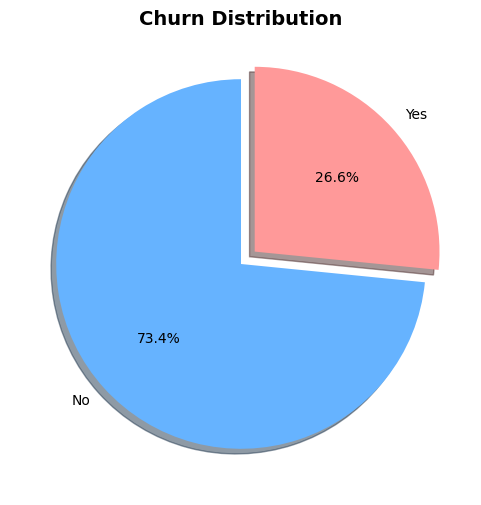

In [12]:
# Pie chart for Churn Distribution
plt.figure(figsize=(6,6))
data['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff', '#ff9999'], 
    explode=[0, 0.1], 
    shadow=True
)
plt.title("Churn Distribution", fontsize=14, fontweight="bold")
plt.ylabel("")  # Hide y-label
plt.show()


In [10]:
# Identify categorical columns
cat_features = data.select_dtypes(include=['object']).columns.tolist()
cat_features.remove('Churn')

In [14]:
for i in cat_features:
    print(i,": ",np.unique(data[i]))

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'No phone service' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'No internet service' 'Yes']
OnlineBackup :  ['No' 'No internet service' 'Yes']
DeviceProtection :  ['No' 'No internet service' 'Yes']
TechSupport :  ['No' 'No internet service' 'Yes']
StreamingTV :  ['No' 'No internet service' 'Yes']
StreamingMovies :  ['No' 'No internet service' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['No' 'Yes']
PaymentMethod :  ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


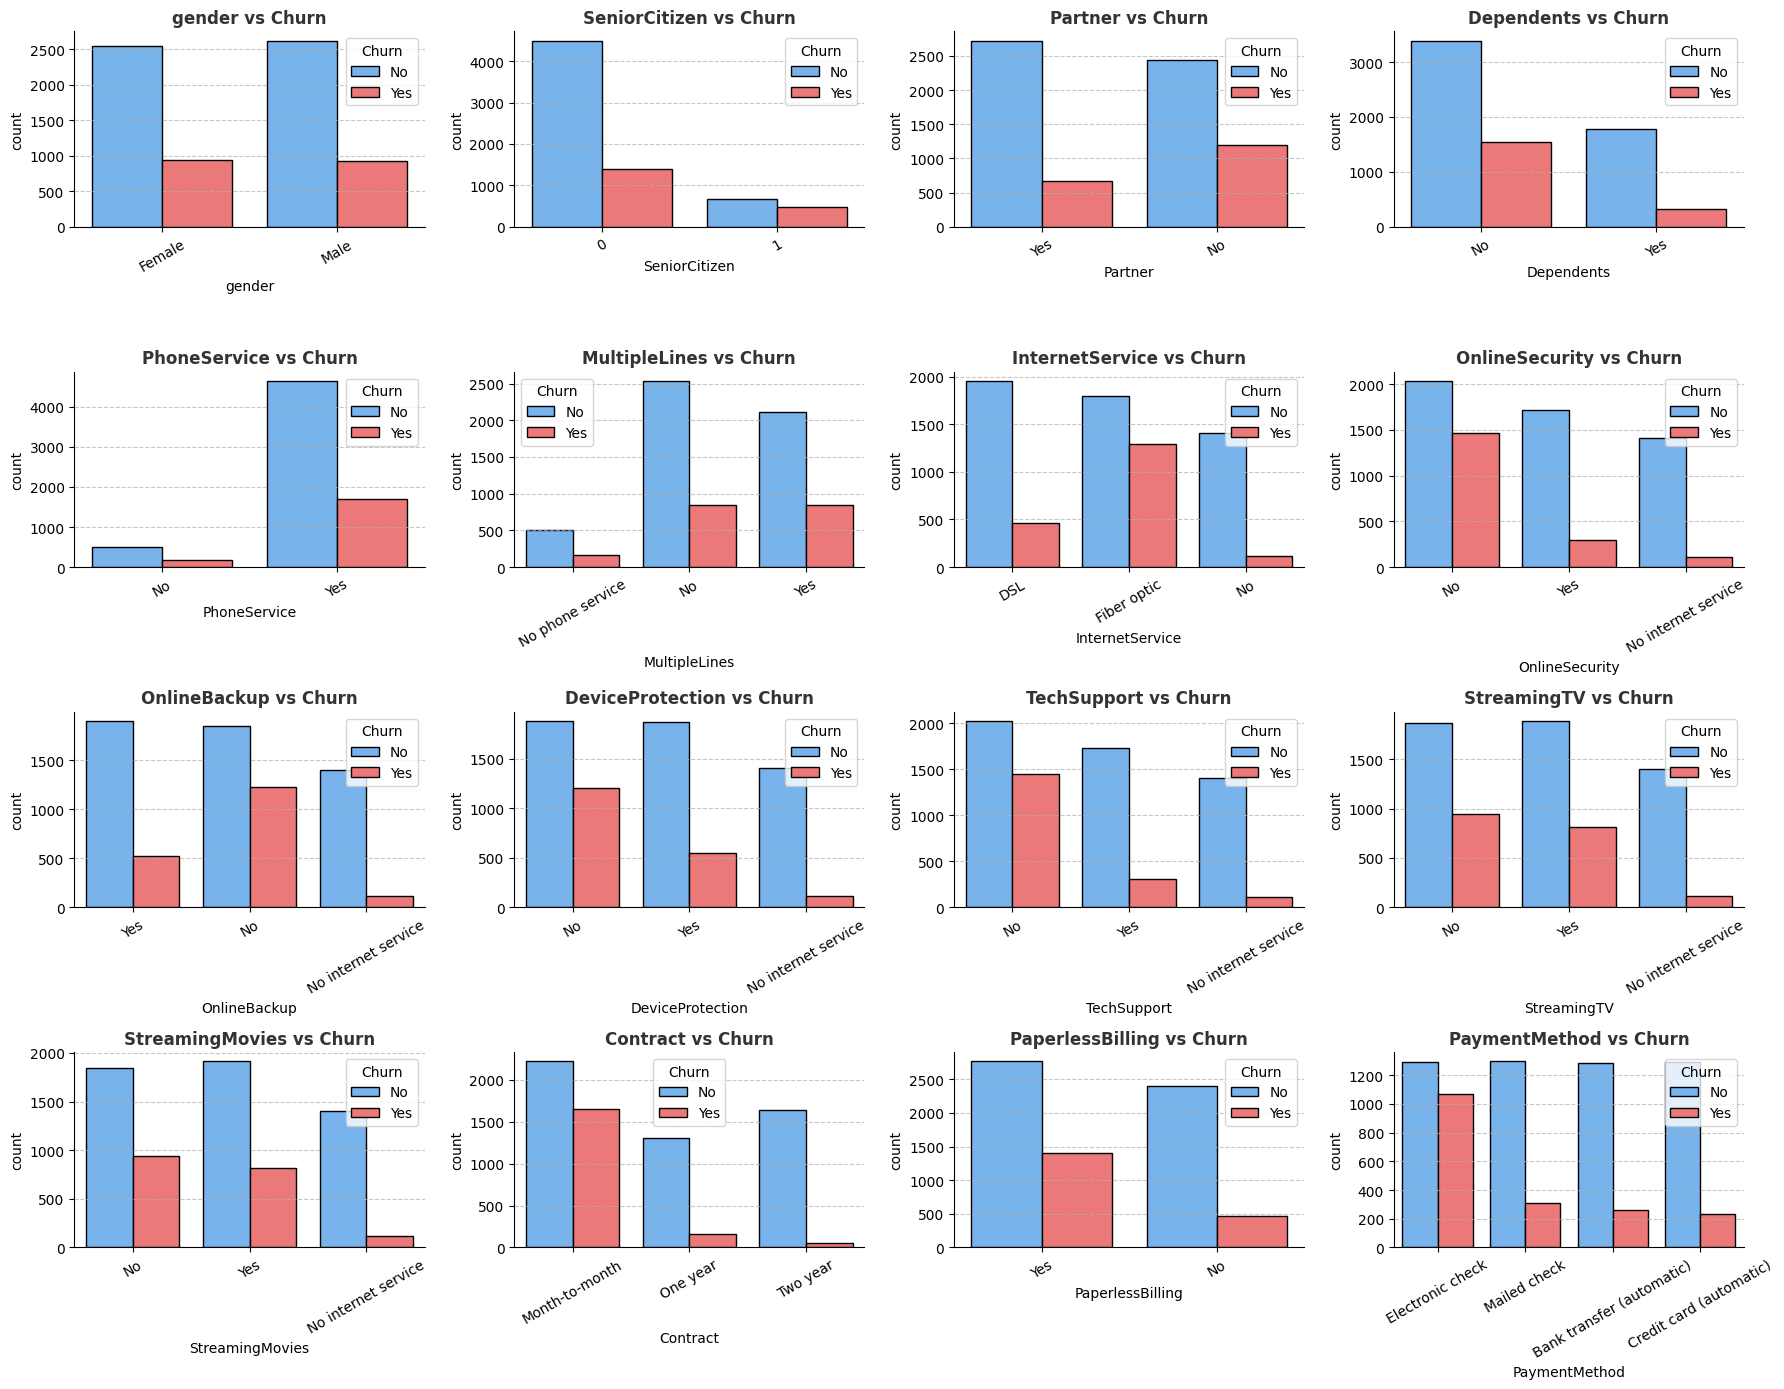

In [ ]:
# Set up subplots: Adjust rows and cols as needed
nrows, ncols = 4, 4  # Adjust based on number of features
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 14))
axes = axes.flatten()

# Define a color palette for better aesthetics
palette = ["#66b3ff", "#ff6666"]  # Blue & Red

# Plot each categorical feature with Churn hue
for i, col in enumerate(cat_features):
    sns.countplot(data=data, x=col, hue="Churn", palette=palette, ax=axes[i], edgecolor="black")
    
    # Improve plot readability
    axes[i].set_title(f"{col} vs Churn", fontsize=12, fontweight="bold", color="#333")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove top and right spines for a cleaner look
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Hide any extra subplots if features are less than total axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve spacing
plt.tight_layout()
plt.show()

<h1>Insights</h1>
Highest churn (~45%) for month-to-month contracts 📉<br>
Yearly and two-year contracts have much lower churn (~10%)<br>
Senior Citizens churn ~42%, while younger customers churn less (~25%).<br>
Electronic check PaymentMethod has highest Churn

In [11]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14996\2027630843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14996\2027630843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14996\2027630843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14996\2027630843.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


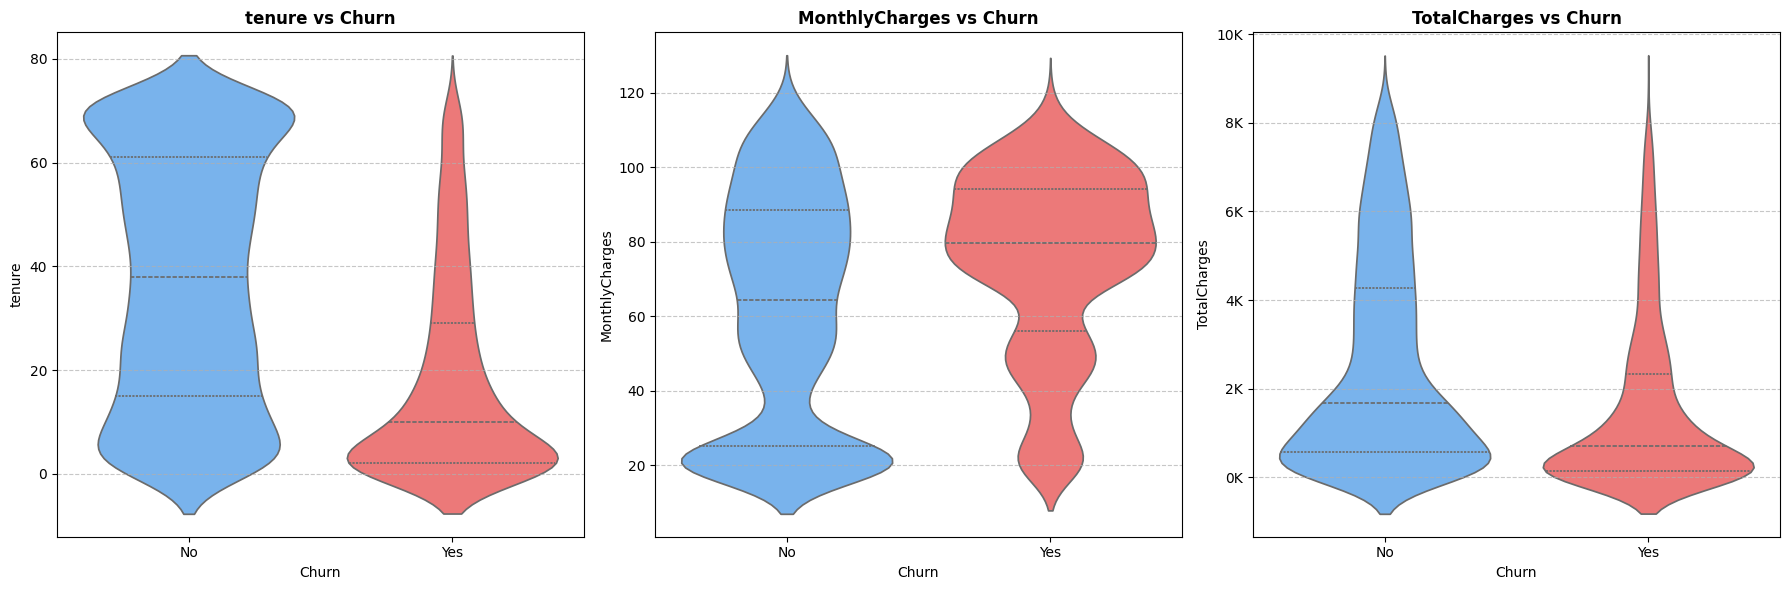

In [87]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Define color palette
palette = ["#66b3ff", "#ff6666"]  # Blue (No Churn) & Red (Churn)

# Plot violin plots for each numerical feature
for i, col in enumerate(num_features):
    sns.violinplot(
        data=data, x="Churn", y=col, palette=palette, ax=axes[i], inner="quartile"
    )
    
    # Set titles and improve readability
    axes[i].set_title(f"{col} vs Churn", fontsize=12, fontweight="bold")
    axes[i].grid(axis='y', linestyle="--", alpha=0.7)
    
    # Adjust TotalCharges y-axis formatting
    if col == "TotalCharges":
        axes[i].set_yticklabels(["{:.0f}K".format(y/1000) for y in axes[i].get_yticks()])

# Improve spacing
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
       [<Axes: title={'center': 'tenure'}>, <Axes: >]], dtype=object)

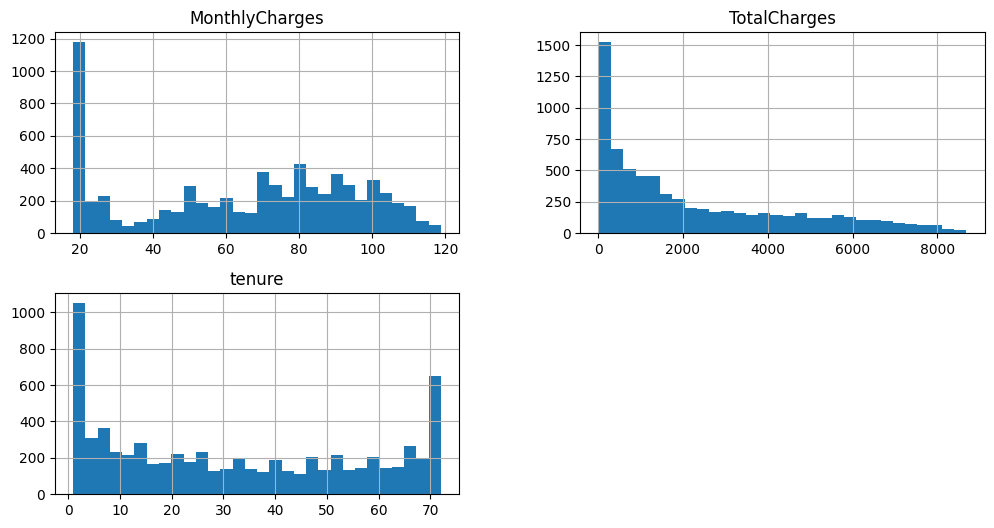

In [65]:
data[['MonthlyCharges', 'TotalCharges', 'tenure']].hist(figsize=(12, 6), bins=30)

In [34]:
for i in cat_features:
    print(i,": ",np.unique(data[i]))

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'No phone service' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'No internet service' 'Yes']
OnlineBackup :  ['No' 'No internet service' 'Yes']
DeviceProtection :  ['No' 'No internet service' 'Yes']
TechSupport :  ['No' 'No internet service' 'Yes']
StreamingTV :  ['No' 'No internet service' 'Yes']
StreamingMovies :  ['No' 'No internet service' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['No' 'Yes']
PaymentMethod :  ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [55]:
df=data.copy()

In [56]:
df['LifetimeValue'] = df['TotalCharges']/df['tenure']

In [57]:
# Define weights for Churn Risk Score
weights = {
    "Contract": {"Month-to-month": 3, "One year": 2, "Two year": 1},  # Higher risk for short contracts
    "PaymentMethod": {"Electronic check": 3, "Mailed check": 2, "Bank transfer (automatic)": 1, "Credit card (automatic)": 1},  # Electronic check users tend to churn more
    "InternetService": {"Fiber optic": 3, "DSL": 2, "No": 1},  # Fiber users tend to churn more
}

# Map weights to data
df["Contract_Risk"] = df["Contract"].map(weights["Contract"])
df["Payment_Risk"] = df["PaymentMethod"].map(weights["PaymentMethod"])
df["Internet_Risk"] = df["InternetService"].map(weights["InternetService"])

# Normalize Tenure & MonthlyCharges for risk contribution
df["Tenure_Risk"] = np.where(df["tenure"] < 12, 3, np.where(df["tenure"] < 24, 2, 1))
df["MonthlyCharge_Risk"] = np.where(df["MonthlyCharges"] > df["MonthlyCharges"].median(), 3, 1)

# Compute Churn Risk Score (Sum of weighted risks)
df["Churn_Risk_Score"] = df[
    ["Contract_Risk", "Payment_Risk", "Internet_Risk", "Tenure_Risk", "MonthlyCharge_Risk"]
].sum(axis=1)

df.drop(columns=["Contract_Risk", "Payment_Risk", "Internet_Risk", "Tenure_Risk", "MonthlyCharge_Risk"], inplace=True)

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'LifetimeValue',
       'Churn_Risk_Score'],
      dtype='object')

In [58]:
service_columns=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

In [59]:
def count_services(row):
    count = 0
    for col in service_columns:
        if col == "InternetService":
            if row[col] != "No":  # Count if not "No"
                count += 1
        else:
            if row[col] == "Yes":  # Count if "Yes"
                count += 1
    return count

In [60]:

df["Subscription_Complexity"] = df.apply(count_services, axis=1)

In [61]:
df["Has_Family"]=0
df.loc[(df["Partner"] == 'Yes') | (df["Dependents"] == 'Yes'),"Has_Family"]=1

In [62]:
df['MultipleLines']=df['MultipleLines'].map(lambda x: 1 if x=='Yes' else 0)
df['InternetService_flag']=df['InternetService'].map(lambda x: 0 if x=='No' else 1)
df['OnlineSecurity']=df['OnlineSecurity'].map(lambda x: 1 if x=='Yes' else 0)
df['OnlineBackup']=df['OnlineBackup'].map(lambda x: 1 if x=='Yes' else 0)
df['DeviceProtection']=df['DeviceProtection'].map(lambda x: 1 if x=='Yes' else 0)
df['TechSupport']=df['TechSupport'].map(lambda x: 1 if x=='Yes' else 0)
df['StreamingTV']=df['StreamingTV'].map(lambda x: 1 if x=='Yes' else 0)
df['StreamingMovies']=df['StreamingMovies'].map(lambda x: 1 if x=='Yes' else 0)

In [63]:
df_dummies_1=pd.get_dummies(df[['gender', 'PhoneService', 'PaperlessBilling', 'PaymentMethod']],drop_first= True).astype(int)
df_dummies_2=pd.get_dummies(df[['InternetService']]).astype(int).drop(columns='InternetService_No')

label_encoder = LabelEncoder()
df['Contract'] = label_encoder.fit_transform(df['Contract'])

df_cleaned=pd.concat([df.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'PaperlessBilling', 'PaymentMethod'],axis=1),
           df_dummies_1, df_dummies_2],axis=1)
df_cleaned['Churn']=df_cleaned['Churn'].map({'Yes':1,'No':0})

In [64]:
df_cleaned.head()

,SeniorCitizen,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,LifetimeValue,Churn_Risk_Score,Subscription_Complexity,Has_Family,InternetService_flag,gender_Male,PhoneService_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,0,1,0,0,1,0,0,0,0,0,29.85,29.85,0,29.850000,12,2,1,1,0,0,1,0,1,0,1,0
1,0,34,0,1,0,1,0,0,0,1,56.95,1889.50,0,55.573529,8,4,0,1,1,1,0,0,0,1,1,0
2,0,2,0,1,1,0,0,0,0,0,53.85,108.15,1,54.075000,11,4,0,1,1,1,1,0,0,1,1,0
3,0,45,0,1,0,1,1,0,0,1,42.30,1840.75,0,40.905556,7,4,0,1,1,0,0,0,0,0,1,0
4,0,2,0,0,0,0,0,0,0,0,70.70,151.65,1,75.825000,15,2,0,1,0,1,1,0,1,0,0,1


In [65]:
df_cleaned['AvgServiceCost'] = df_cleaned['TotalCharges']/df_cleaned['Subscription_Complexity']

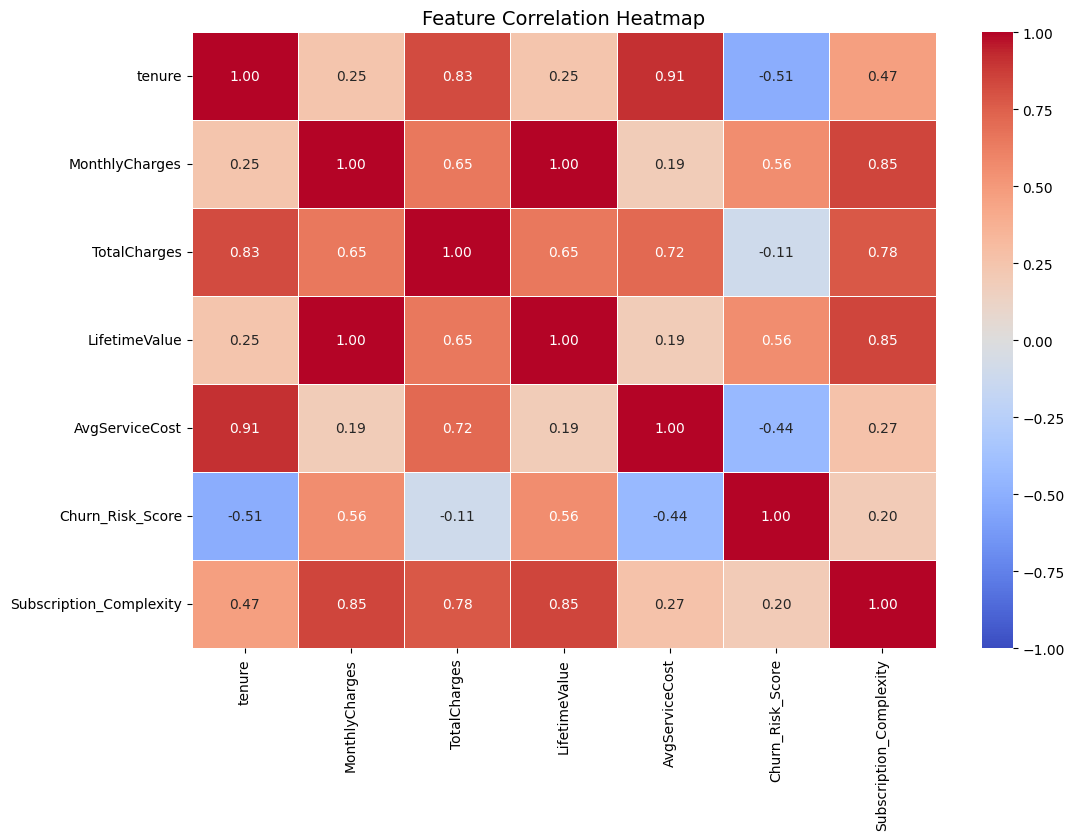

In [358]:
# Compute correlation matrix
corr_matrix = df_cleaned[['tenure','MonthlyCharges','TotalCharges','LifetimeValue','AvgServiceCost','Churn_Risk_Score', 'Subscription_Complexity']].corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,        # Show correlation values
    fmt=".2f",         # Limit to 2 decimal places
    cmap="coolwarm",   # Color scheme
    linewidths=0.5,    # Line width between cells
    vmin=-1, vmax=1    # Scale range from -1 to 1
)

# Add title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

In [39]:
df_cleaned.columns

Index(['SeniorCitizen', 'tenure', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'LifetimeValue', 'Churn_Risk_Score', 'Subscription_Complexity',
       'Has_Family', 'InternetService_flag', 'gender_Male', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic', 'AvgServiceCost'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

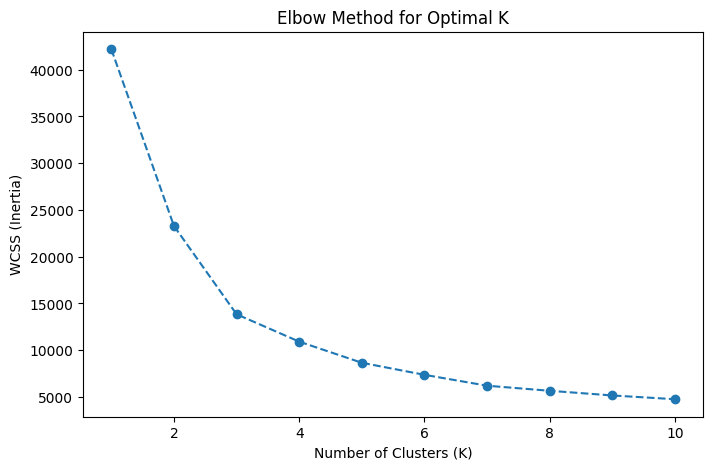

In [67]:
# Select numerical features for clustering
features_for_clustering = df_cleaned[["TotalCharges", "MonthlyCharges", "tenure", "LifetimeValue", "Subscription_Complexity", "Churn_Risk_Score"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
# Compute WCSS for different values of K
wcss = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS metric

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned["Customer_Segment"] = kmeans.fit_predict(features_for_clustering)

In [70]:
df_cleaned.groupby('Customer_Segment')['Churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer_Segment,,,,,,,,
0,1259.0,0.138205,0.345252,0.0,0.0,0.0,0.0,1.0
1,1612.0,0.222084,0.415777,0.0,0.0,0.0,0.0,1.0
2,4161.0,0.321317,0.467038,0.0,0.0,0.0,1.0,1.0


In [71]:
# Split data into features (X) and target (y)
X = df_cleaned.drop(columns=["Churn",'InternetService_DSL', 'InternetService_Fiber optic','InternetService_flag','PhoneService_Yes',
                             'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])  # Features
y = df_cleaned["Churn"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [129]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring="recall", cv=5)
grid_search.fit(X_train, y_train)

print("Best Recall Model:", grid_search.best_params_)

Best Recall Model: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


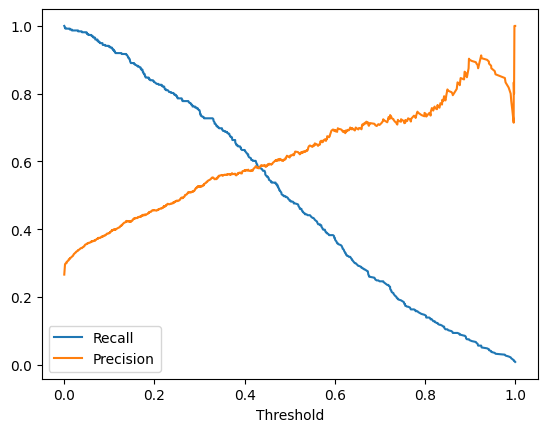

In [130]:
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve to find the best threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, precision[:-1], label="Precision")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [131]:
new_threshold = 0.3
y_pred_adjusted = (y_pred_proba >= new_threshold).astype(int)

In [ ]:
# Predict probabilities
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = grid_search.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_adjusted))

Final Model AUC-ROC: 0.7524
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.77      1407

[[781 252]
 [ 94 280]]


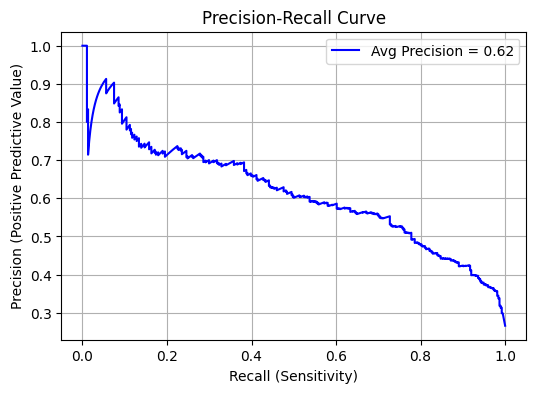

In [ ]:

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"Avg Precision = {avg_precision:.2f}", color="blue")
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision (Positive Predictive Value)")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13560\3646893017.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", linestyle="dashed", label="Random Guess")


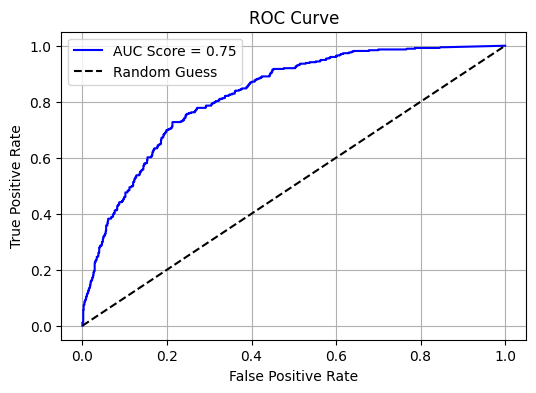

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_adjusted)
# Compute False Positive Rate & True Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC Score = {auc_score:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--", linestyle="dashed", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13560\3454305395.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")


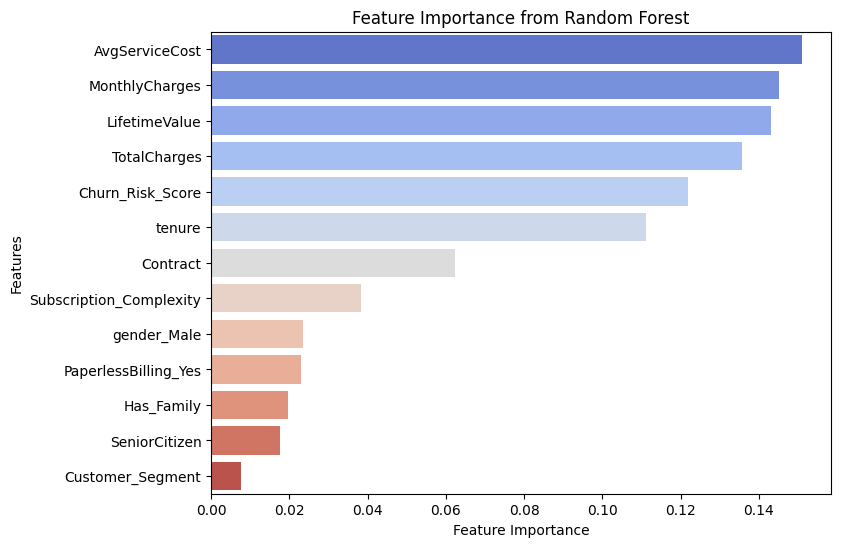

In [121]:
# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()